In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandasql import sqldf
sns.set(style = 'whitegrid')

In [2]:
path = os.path.normpath(os.getcwd() + os.sep + os.pardir) + "\[3] Data_Preprocessing" + "\_final_processed.csv"
print(path)

H:\Projects\Epsilon InternShip\Cars Price Prediction\[3] Data_Preprocessing\_final_processed.csv


In [3]:
data = pd.read_csv(path,encoding='latin-1')
data.tail()

,Make,Model,CC,Used since,Km,Transmission,City,Color,Body Style,Fuel,...,Rear camera,GPS,Fog light,Rear spoiler,Cruise control,Power Seats,Central lock,Alarm,Price,Is_CC
37740,Skoda,Octavia A5,0,2008,144000,automatic,Helwan,Black,None,gas,...,1,0,0,1,1,0,1,1,155000,0
37741,Toyota,Corolla,0,2019,59000,automatic,Mansoura,White,None,gas,...,0,0,0,0,1,0,1,1,362000,0
37742,Lada,2107,0,2011,43000,manual,Alexandria,Silver,None,gas,...,0,0,0,0,0,0,0,0,65000,0
37743,Renault,Logan,0,2013,0,manual,El Qanater El Khayreya,Red,None,gas,...,0,0,0,0,0,0,0,0,80000,0
37744,BMW,X1,0,2014,123000,automatic,Giza,Silver,None,gas,...,0,0,0,0,0,0,0,0,310000,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37745 entries, 0 to 37744
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Make                        37745 non-null  object
 1   Model                       37745 non-null  object
 2   CC                          37745 non-null  int64 
 3   Used since                  37745 non-null  int64 
 4   Km                          37745 non-null  int64 
 5   Transmission                37745 non-null  object
 6   City                        37745 non-null  object
 7   Color                       37745 non-null  object
 8   Body Style                  37745 non-null  object
 9   Fuel                        37745 non-null  object
 10  Leather seats               37745 non-null  int64 
 11  Closing mirrors             37745 non-null  int64 
 12  Intelligent parking system  37745 non-null  int64 
 13  Sunroof                     37745 non-null  in

In [4]:
def Pie(feature,limit= 10,title=" "):
    global data
    plt.figure(figsize=(12,6))
    values = data[feature].value_counts()[:limit]
    plt.pie(values , labels = list(values.index),autopct='%1.f%%',labeldistance=1.1)
    plt.title(title)
    plt.show()
def Kde(feature):
    global data
    plt.figure(figsize=(12,6))
    sns.kdeplot(data[feature],shade=True)
    plt.show()
    
def countPlot(feature):
    global data
    plt.figure(figsize=(11,6))
    sns.countplot(x=feature , data=data)
    plt.show()
    

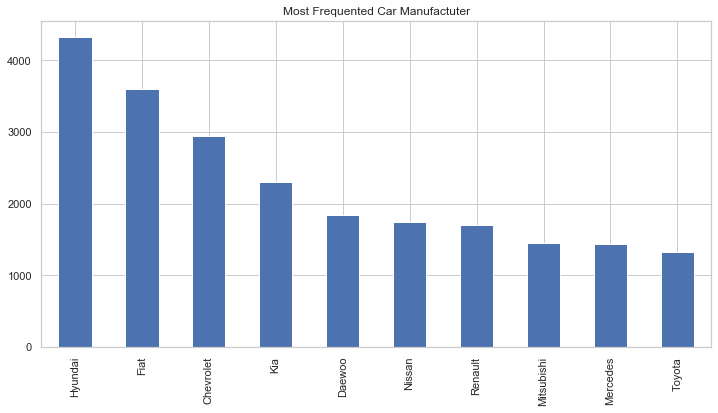

In [5]:
plt.figure(figsize=(12,6))
data['Make'].value_counts()[:10].plot(kind='bar')
plt.title('Most Frequented Car Manufactuter')
plt.show()

most car manufacturer is "hyundai"

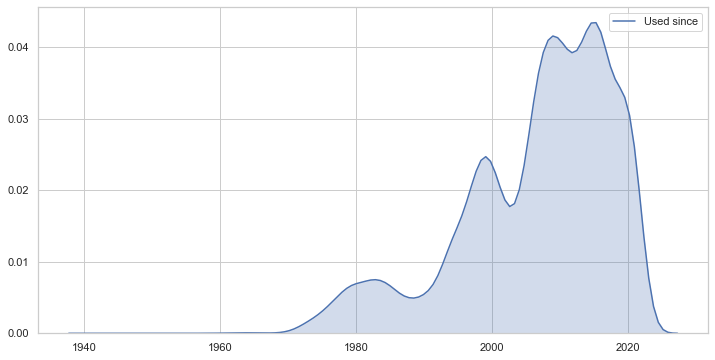

In [6]:
Kde('Used since')

The year most cars were manufactured in 2015

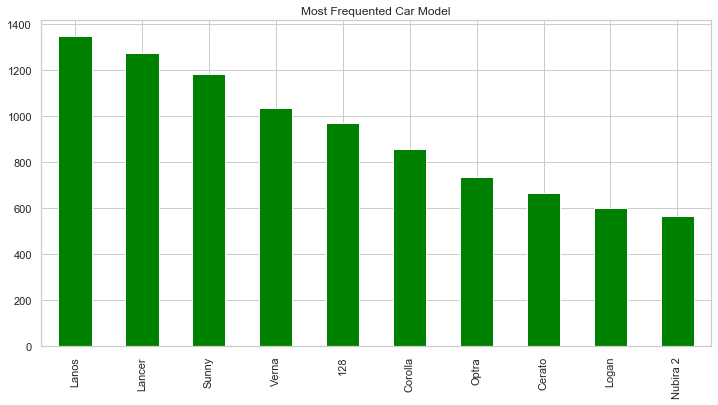

In [7]:
plt.figure(figsize=(12,6))
data['Model'].value_counts()[:10].plot(kind='bar',color='Green')
plt.title('Most Frequented Car Model')
plt.show()

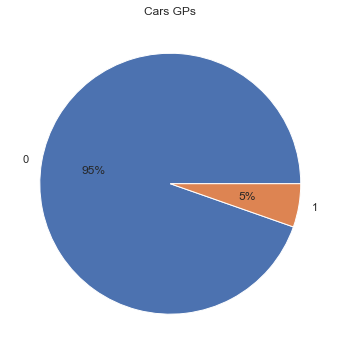

In [8]:
Pie('GPS',title="Cars GPs")

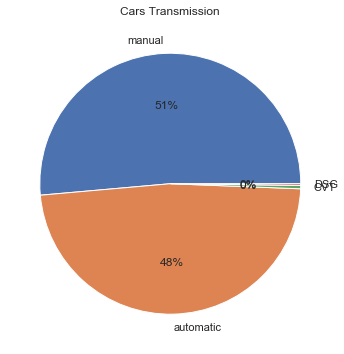

In [9]:
Pie('Transmission',title="Cars Transmission")

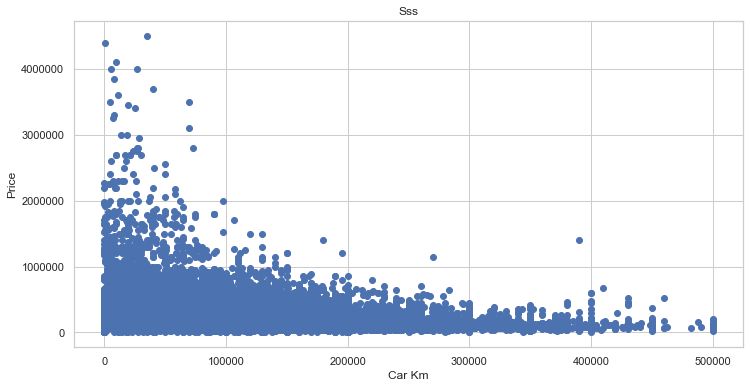

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(x=data['Km'],y=data['Price'])
plt.xlabel('Car Km')
plt.ylabel("Price")
plt.title('Sss')
plt.show()

In [11]:
MaketoPrice=data.groupby('Make').mean()['Price'] / 10000
MaketoPrice = pd.DataFrame({"Make":MaketoPrice.index,'Price':MaketoPrice.values })
MaketoPrice = MaketoPrice.sort_values('Price',ascending = False)[:15]

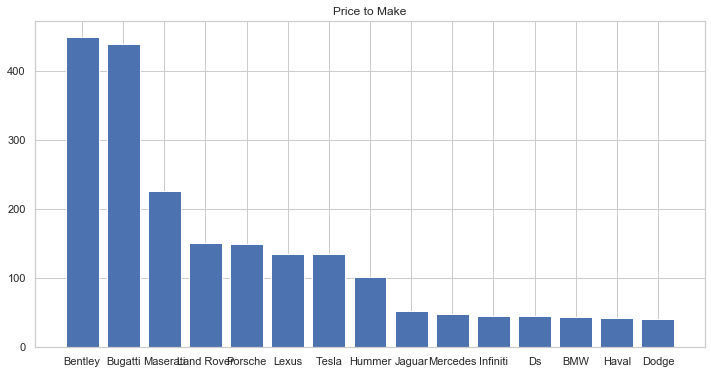

In [12]:
plt.figure(figsize=(12,6))
plt.bar(MaketoPrice.Make , height = MaketoPrice.Price)
plt.title('Price to Make')
plt.show()

as we can see here , the price of car affected by it manufacturer

In [13]:
FuelToPrice = data.groupby('Fuel').mean()['Price'] / 10000
FuelToPrice = pd.DataFrame({'Fuel':FuelToPrice.index , 'Price':FuelToPrice.values})

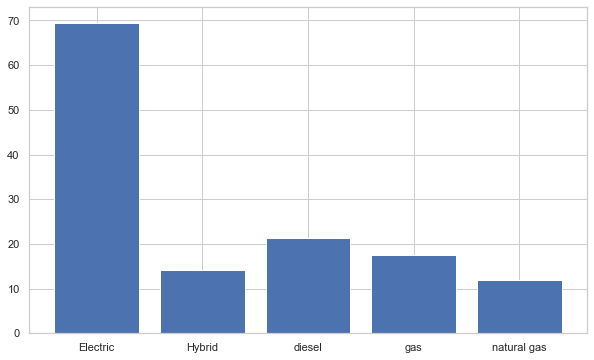

In [14]:
plt.figure(figsize=(10,6))
plt.bar(x=FuelToPrice.Fuel , height = FuelToPrice.Price)
plt.show()

In [15]:
Style_Price = data.groupby('Body Style').mean()['Price']/1000
Style_Price = pd.DataFrame({'Style':Style_Price.index , 'Price':Style_Price.values})
Style_Price = Style_Price.sort_values('Price',ascending=False)

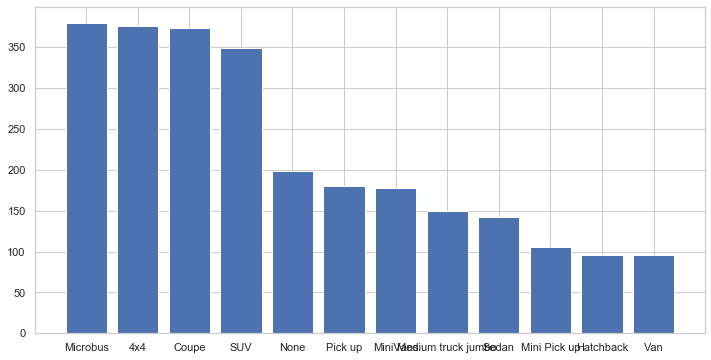

In [16]:
plt.figure(figsize=(12,6))
plt.bar(x=Style_Price.Style , height = Style_Price.Price)
plt.show()

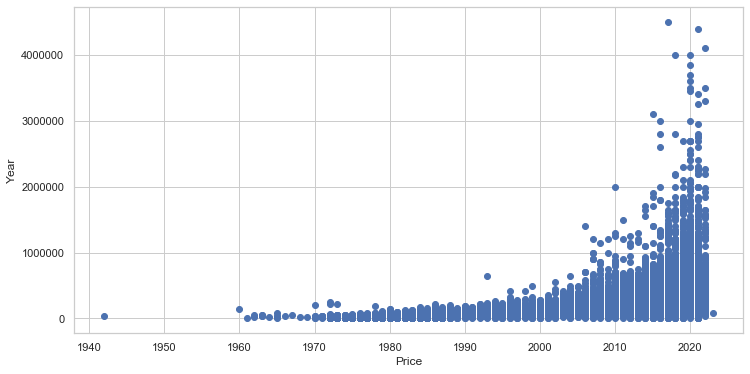

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(x=data['Used since'] , y = data['Price'])
plt.xlabel("Price")
plt.ylabel("Year")
plt.show()

In [18]:
data.columns

Index(['Make', 'Model', 'CC', 'Used since', 'Km', 'Transmission', 'City',
       'Color', 'Body Style', 'Fuel', 'Leather seats', 'Closing mirrors',
       'Intelligent parking system', 'Sunroof', 'Fabric brushes',
       'Air Conditioning', 'Power Steering', 'Remote Keyless',
       'Electric mirrors', 'Front Power Windows', 'Back Power Windows',
       'Tinted Glass', 'CD Player', 'DVD Player', 'Bluetooth', 'Multifunction',
       'Cassette Radio', 'AUX', 'CD Changer', 'USB Port',
       'Anti - theft System', 'Side Airbag', 'ABS', 'EPS', 'EBD', 'ESP',
       'Sensors', 'Rear sensors', 'Driver Airbag', 'Passenger Airbag',
       'Front sensors', 'Alloy wheels', 'Rear camera', 'GPS', 'Fog light',
       'Rear spoiler', 'Cruise control', 'Power Seats', 'Central lock',
       'Alarm', 'Price', 'Is_CC'],
      dtype='object')

In [21]:
sqldf('SELECT Price , Transmission FROM data GROUP BY Transmission ORDER BY Price DESC')

,Price,Transmission
0,480000,CVT
1,430000,DSG
2,225000,manual
3,225000,automatic


In [25]:
parkingSytem=sqldf('SELECT Price , "Intelligent parking system" FROM data GROUP BY "Intelligent parking system" ORDER BY Price DESC')
parkingSytem

,Price,Intelligent parking system
0,295000,1
1,225000,0


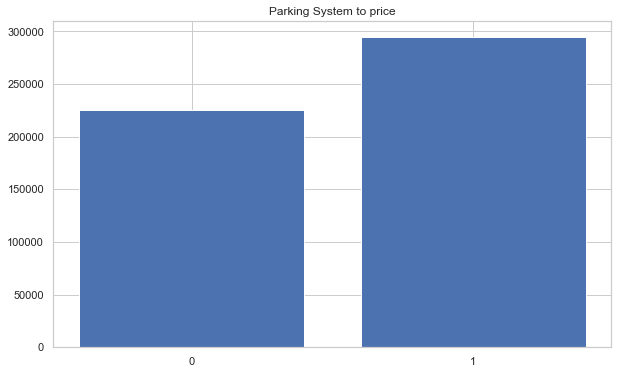

In [42]:
plt.figure(figsize=(10,6))
plt.bar(x=parkingSytem['Intelligent parking system'],height=parkingSytem['Price'],tick_label=['1','0'])
plt.title('Parking System to price')
plt.show()

In [44]:
sqldf('SELECT Price , Transmission , Fuel FROM data GROUP BY Transmission ,Fuel ORDER BY Price DESC')

,Price,Transmission,Fuel
0,2200000,automatic,Electric
1,680000,automatic,diesel
2,480000,CVT,gas
3,430000,DSG,gas
4,225000,automatic,gas
5,225000,manual,gas
6,170000,automatic,natural gas
7,150000,automatic,Hybrid
8,135000,manual,Hybrid
9,120000,manual,diesel
